In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://fbref.com/en/comps/Big5/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={"id": "big5_table"})[0]

In [3]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Inter,it ITA,1,33,27,5,1,79,18,...,86,2.61,69.9,26.7,43.2,1.31,D W W D W,72888,Lautaro Martínez - 23,Yann Sommer
1,2,Leverkusen,de GER,1,31,25,6,0,77,22,...,81,2.61,64.3,26.3,38.0,1.22,W W W D D,29980,"Florian Wirtz, Victor Boniface - 11",Lukáš Hrádecký
2,3,Real Madrid,es ESP,1,33,26,6,1,71,22,...,84,2.55,60.5,29.7,30.7,0.93,W W W W W,72121,Jude Bellingham - 17,Andriy Lunin
3,4,Manchester City,eng ENG,2,33,23,7,3,80,32,...,76,2.30,68.4,31.2,37.3,1.13,D W W W W,52923,Erling Haaland - 20,Ederson
4,5,Arsenal,eng ENG,1,34,24,5,5,82,26,...,77,2.26,67.4,24.0,43.4,1.28,W W L W W,60225,Bukayo Saka - 14,David Raya


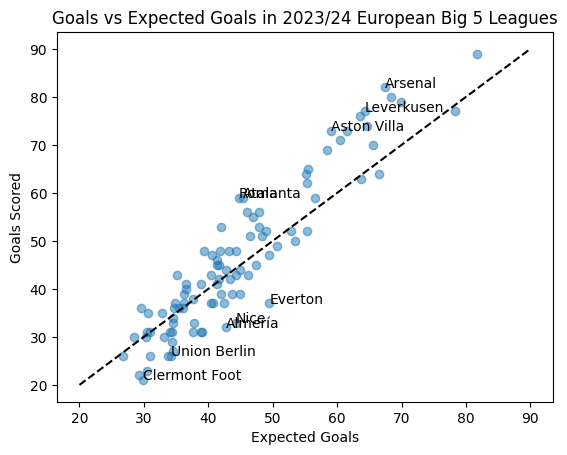

In [9]:
fig, ax = plt.subplots()

ax.scatter(df['xG'], df['GF'], alpha=.5)

ax.set_xlabel('Expected Goals')
ax.set_ylabel('Goals Scored')
ax.set_title('Goals vs Expected Goals in 2023/24 European Big 5 Leagues')

ax.plot([20, 90], [20, 90], color='black', linestyle='--')

df['difference'] = df['GF'] - df['xG']

overperformers = df.nlargest(5, 'difference')
underperformers = df.nsmallest(5, 'difference')

for i in range(5):
    ax.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['GF'], overperformers.iloc[i]['Squad'])
    ax.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['GF'], underperformers.iloc[i]['Squad'])